<a href="https://colab.research.google.com/github/Alfikriangelo/DeepLearningTasks/blob/main/5thWeekTask/ReviewTokoBaju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==================== 1. Import Library ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# ==================== 2. Load & Preprocessing ====================
df = pd.read_csv("sample_data/ReviewTokoBaju.csv")
df = df[['Review Text', 'Recommended IND']].dropna()

tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['Review Text'])
sequences = tokenizer.texts_to_sequences(df['Review Text'])

X = pad_sequences(sequences, maxlen=200)
y = df['Recommended IND'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **RNN (Recurrent Neural Network)**

### Persamaan:

Untuk setiap waktu ke-$$t$$:

$$
h_t = \tanh\bigl(W_{xh} x_t + W_{hh} h_{t-1} + b_h\bigr)
$$

$$
y_t = W_{hy} h_t + b_y
$$

### 📘 Penjelasan Variabel:

| Simbol     | Keterangan                               |
|------------|------------------------------------------|
| $$x_t$$    | Input pada waktu ke-$$t$$                |
| $$h_{t-1}$$| Hidden state dari waktu sebelumnya       |
| $$h_t$$    | Hidden state pada waktu ke-$$t$$         |
| $$y_t$$    | Output model pada waktu ke-$$t$$         |
| $$W_{xh}$$ | Bobot dari input ke hidden               |
| $$W_{hh}$$ | Bobot dari hidden ke hidden              |
| $$W_{hy}$$ | Bobot dari hidden ke output              |
| $$b_h$$    | Bias pada hidden                         |
| $$b_y$$    | Bias pada output                         |
| $$\tanh$$  | Fungsi aktivasi non-linear               |


In [ ]:
# ==================== 3. RNN Model ====================
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=5000, output_dim=100, input_length=200))
model_rnn.add(SimpleRNN(128))
model_rnn.add(Dropout(0.3))
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_test, y_test),
                            epochs=10, batch_size=128, callbacks=[EarlyStopping(patience=2)])



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


142/142 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.8075 - loss: 0.4898 - val_accuracy: 0.8320 - val_loss: 0.4141
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.8028 - loss: 0.4445 - val_accuracy: 0.8375 - val_loss: 0.4085
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8377 - loss: 0.3968 - val_accuracy: 0.8481 - val_loss: 0.3868
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8535 - loss: 0.3562 - val_accuracy: 0.8527 - val_loss: 0.3643
Epoch 5/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8832 - loss: 0.2933 - val_accuracy: 0.8647 - val_loss: 0.3443
Epoch 6/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8993 - loss: 0.2605 - val_accuracy: 0.8607 - val_loss: 0.3441
Epoch 7/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9125 - loss: 0.2281 - val_accuracy: 0.8660 - val_loss: 0.3602
Epoch 8/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9212 - loss: 0.2048 - val_accuracy: 0.849

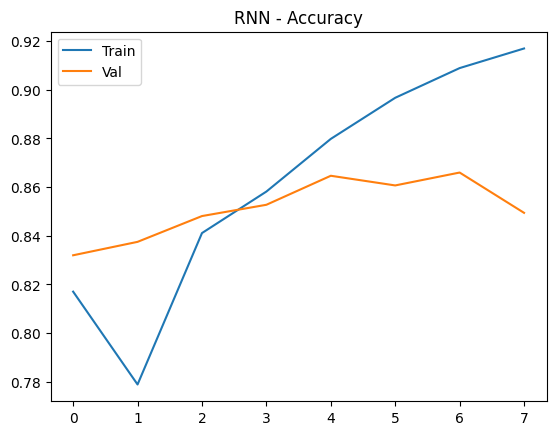

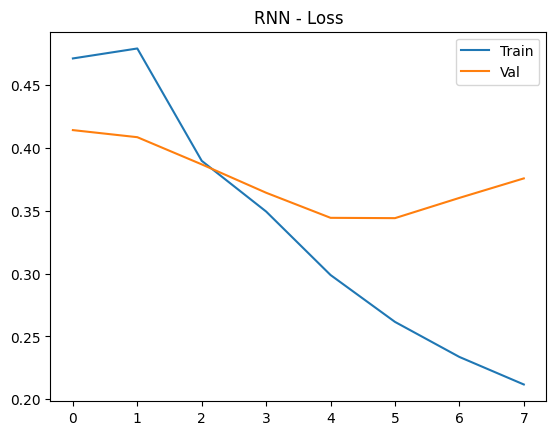

In [ ]:
# Plot
plt.plot(history_rnn.history['accuracy'], label='Train')
plt.plot(history_rnn.history['val_accuracy'], label='Val')
plt.title("RNN - Accuracy")
plt.legend()
plt.show()

plt.plot(history_rnn.history['loss'], label='Train')
plt.plot(history_rnn.history['val_loss'], label='Val')
plt.title("RNN - Loss")
plt.legend()
plt.show()

142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
RNN Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.61      0.59       812
           1       0.91      0.90      0.91      3717

    accuracy                           0.85      4529
   macro avg       0.74      0.75      0.75      4529
weighted avg       0.85      0.85      0.85      4529

RNN AUC: 0.8577369190419202


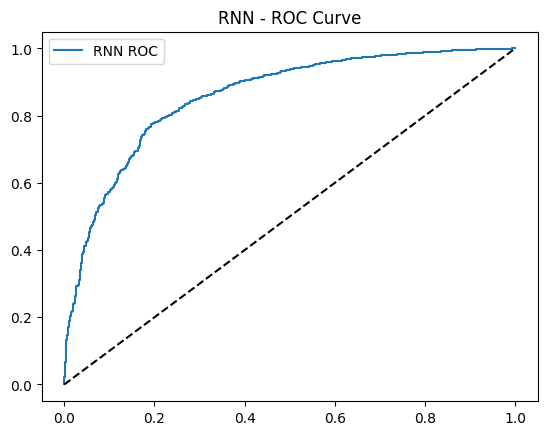

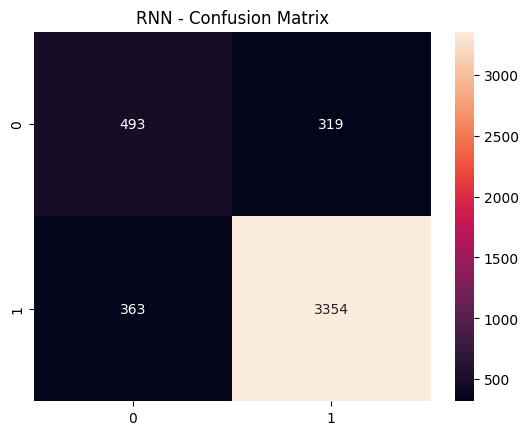

In [ ]:
# Eval
y_pred_prob = model_rnn.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print("RNN Classification Report:\n", classification_report(y_test, y_pred))
print("RNN AUC:", roc_auc_score(y_test, y_pred_prob))

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label="RNN ROC")
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.title("RNN - ROC Curve")
plt.show()

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("RNN - Confusion Matrix")
plt.show()

## **LSTM (Long Short‑Term Memory)**

### Persamaan:

$$
\begin{aligned}
f_t &= \sigma\bigl(W_f x_t + U_f h_{t-1} + b_f\bigr)\\
i_t &= \sigma\bigl(W_i x_t + U_i h_{t-1} + b_i\bigr)\\
\tilde{c}_t &= \tanh\bigl(W_c x_t + U_c h_{t-1} + b_c\bigr)\\
c_t &= f_t \odot c_{t-1} + i_t \odot \tilde{c}_t\\
o_t &= \sigma\bigl(W_o x_t + U_o h_{t-1} + b_o\bigr)\\
h_t &= o_t \odot \tanh(c_t)
\end{aligned}
$$

### Penjelasan Variabel:

| Simbol           | Keterangan                                 |
|------------------|--------------------------------------------|
| $$f_t$$          | Forget gate                                |
| $$i_t$$          | Input gate                                 |
| $$\tilde{c}_t$$  | Kandidat memori baru                       |
| $$c_t$$          | Cell state (memori jangka panjang)         |
| $$o_t$$          | Output gate                                |
| $$\sigma$$       | Fungsi sigmoid                             |
| $$\tanh$$        | Fungsi aktivasi tanh                       |
| $$\odot$$        | Perkalian elemen‑wise                      |


In [ ]:
# ==================== 4. LSTM Model ====================
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=5000, output_dim=100, input_length=200))
model_lstm.add(LSTM(128))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = model_lstm.fit(X_train, y_train, validation_data=(X_test, y_test),
                              epochs=10, batch_size=128, callbacks=[EarlyStopping(patience=2)])

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8180 - loss: 0.4642 - val_accuracy: 0.8739 - val_loss: 0.2910
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9013 - loss: 0.2353 - val_accuracy: 0.8881 - val_loss: 0.2540
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9249 - loss: 0.1884 - val_accuracy: 0.8916 - val_loss: 0.2609
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9377 - loss: 0.1590 - val_accuracy: 0.8865 - val_loss: 0.2717


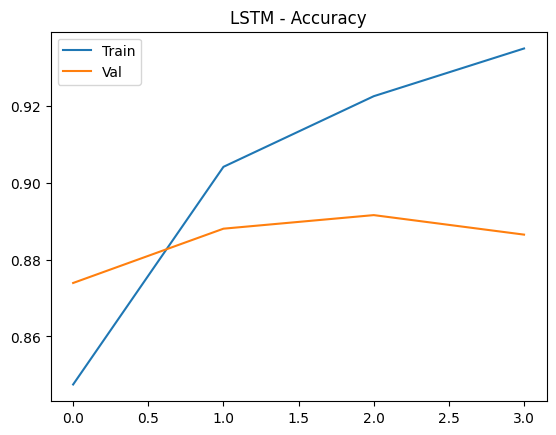

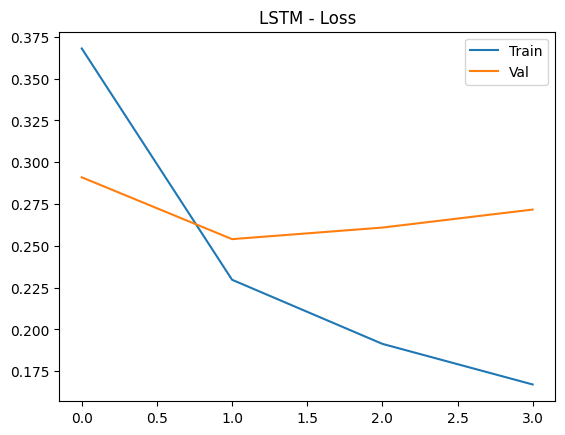

In [ ]:
# Plot
plt.plot(history_lstm.history['accuracy'], label='Train')
plt.plot(history_lstm.history['val_accuracy'], label='Val')
plt.title("LSTM - Accuracy")
plt.legend()
plt.show()

plt.plot(history_lstm.history['loss'], label='Train')
plt.plot(history_lstm.history['val_loss'], label='Val')
plt.title("LSTM - Loss")
plt.legend()
plt.show()

142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
LSTM Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.66      0.68       812
           1       0.93      0.94      0.93      3717

    accuracy                           0.89      4529
   macro avg       0.81      0.80      0.80      4529
weighted avg       0.88      0.89      0.89      4529

LSTM AUC: 0.9262443824208038


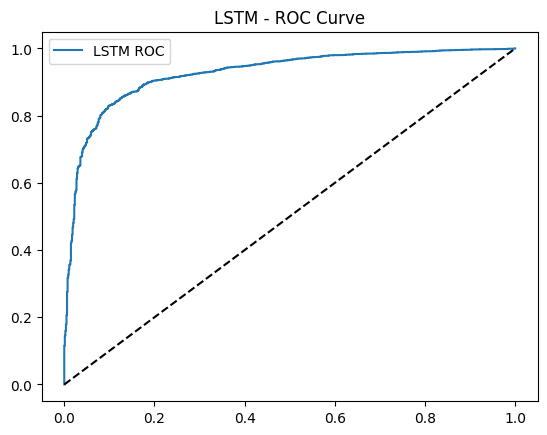

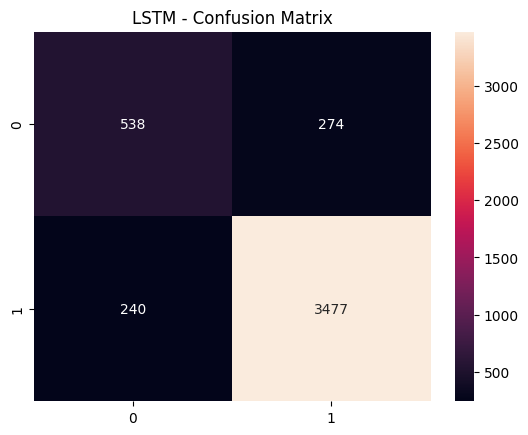

In [ ]:
# Eval
y_pred_prob = model_lstm.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print("LSTM Classification Report:\n", classification_report(y_test, y_pred))
print("LSTM AUC:", roc_auc_score(y_test, y_pred_prob))

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label="LSTM ROC")
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.title("LSTM - ROC Curve")
plt.show()

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("LSTM - Confusion Matrix")
plt.show()

## **GRU (Gated Recurrent Unit)**

### Persamaan:

$$
\begin{aligned}
z_t &= \sigma\bigl(W_z x_t + U_z h_{t-1} + b_z\bigr)\\
r_t &= \sigma\bigl(W_r x_t + U_r h_{t-1} + b_r\bigr)\\
\tilde{h}_t &= \tanh\bigl(W_h x_t + U_h (r_t \odot h_{t-1}) + b_h\bigr)\\
h_t &= (1 - z_t) \odot h_{t-1} + z_t \odot \tilde{h}_t
\end{aligned}
$$

### Penjelasan Variabel:

| Simbol          | Keterangan                           |
|-----------------|--------------------------------------|
| $$z_t$$         | Update gate                          |
| $$r_t$$         | Reset gate                           |
| $$\tilde{h}_t$$ | Kandidat hidden state                |
| $$h_t$$         | Hidden state akhir                   |
| $$\sigma$$      | Fungsi sigmoid                       |
| $$\tanh$$       | Fungsi aktivasi tanh                 |
| $$\odot$$       | Perkalian elemen‑wise                |

In [ ]:
# ==================== 5. GRU Model ====================
model_gru = Sequential()
model_gru.add(Embedding(input_dim=5000, output_dim=100, input_length=200))
model_gru.add(GRU(128))
model_gru.add(Dropout(0.3))
model_gru.add(Dense(1, activation='sigmoid'))

model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_gru = model_gru.fit(X_train, y_train, validation_data=(X_test, y_test),
                            epochs=10, batch_size=128, callbacks=[EarlyStopping(patience=2)])

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8090 - loss: 0.4690 - val_accuracy: 0.8527 - val_loss: 0.3415
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8865 - loss: 0.2614 - val_accuracy: 0.8839 - val_loss: 0.2646
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9199 - loss: 0.1976 - val_accuracy: 0.8903 - val_loss: 0.2556
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9349 - loss: 0.1644 - val_accuracy: 0.8867 - val_loss: 0.2706
Epoch 5/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9444 - loss: 0.1439 - val_accuracy: 0.8909 - val_loss: 0.3029


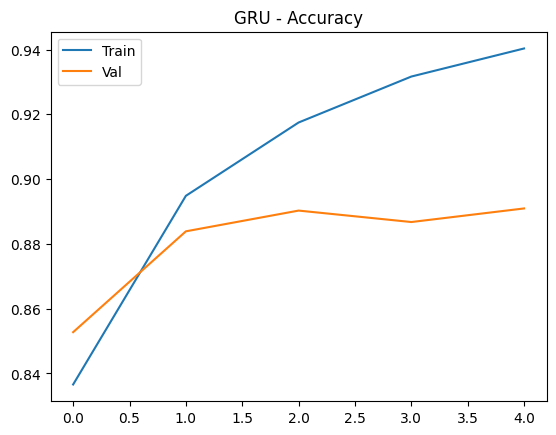

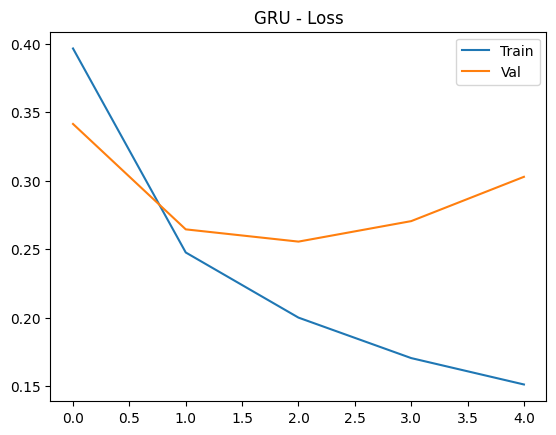

In [ ]:
# Plot
plt.plot(history_gru.history['accuracy'], label='Train')
plt.plot(history_gru.history['val_accuracy'], label='Val')
plt.title("GRU - Accuracy")
plt.legend()
plt.show()

plt.plot(history_gru.history['loss'], label='Train')
plt.plot(history_gru.history['val_loss'], label='Val')
plt.title("GRU - Loss")
plt.legend()
plt.show()

142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
GRU Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.60      0.67       812
           1       0.92      0.95      0.93      3717

    accuracy                           0.89      4529
   macro avg       0.83      0.78      0.80      4529
weighted avg       0.89      0.89      0.89      4529

GRU AUC: 0.916826198626733


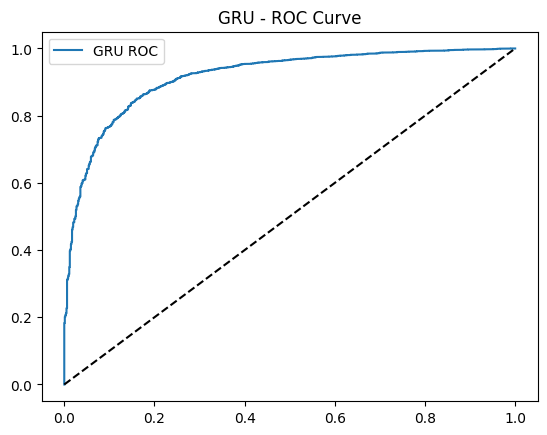

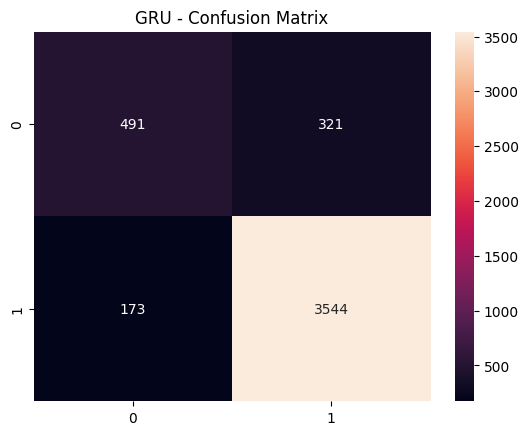

In [ ]:
# Eval
y_pred_prob = model_gru.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print("GRU Classification Report:\n", classification_report(y_test, y_pred))
print("GRU AUC:", roc_auc_score(y_test, y_pred_prob))

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label="GRU ROC")
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.title("GRU - ROC Curve")
plt.show()

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("GRU - Confusion Matrix")
plt.show()

# **Kesimpulan**

Berdasarkan hasil evaluasi ketiga arsitektur—RNN, LSTM, dan GRU—dapat disimpulkan bahwa ketiganya sudah mampu menembus ambang akurasi minimal 70%, namun performa terbaik diperlihatkan oleh LSTM. Model RNN dasar mencapai akurasi sebesar 85 % dengan nilai AUC sekitar 0,86, tetapi cenderung kurang seimbang dalam mengklasifikasikan kelas negatif (0): presisi hanya 58 % dan recall 61 %, sehingga F1-score kelas 0 berada di kisaran 0,59. Sebaliknya, model ini sangat handal dalam mendeteksi kelas positif (1), dengan F1-score 0,91, sehingga menghasilkan weighted average F1 sebesar 0,85.

LSTM memperlihatkan peningkatan yang signifikan: akurasi mencapai 89 % dan AUC menanjak tajam menjadi 0,93. Untuk kelas negatif, LSTM berhasil menaikkan presisi menjadi 69 % dan recall menjadi 66 %, menghasilkan F1-score 0,68—sekitar 10 poin lebih tinggi daripada RNN. Pada kelas positif, LSTM juga unggul dengan precision 93 % dan recall 94 %, menandakan kemampuannya mempertahankan keseimbangan antara kesalahan positif palsu dan negatif palsu.

Sementara itu, GRU menampilkan akurasi dan weighted F1 serupa LSTM (keduanya 89 % dan 0,89), serta AUC yang juga tinggi (0,92). Keunggulan GRU terlihat pada presisi kelas negatif yang mencapai 74 %, tertinggi di antara ketiga model, namun recall kelas negatifnya agak lebih rendah (60 %), sehingga F1-score-nya 0,67—masih di bawah LSTM. Pada kelas positif, GRU pun efektif (precision 92 %, recall 95 %, F1 0,93).

Secara keseluruhan, LSTM menawarkan keseimbangan terbaik antara presisi dan recall pada kedua kelas, dengan kemampuan memaksimalkan AUC tertinggi. GRU bisa menjadi pilihan apabila prioritasnya adalah meminimalkan false positive pada kelas negatif, sedangkan RNN dasar, meski lebih sederhana, menunjukkan keterbatasan terutama dalam menangani kelas yang lebih jarang muncul dan cenderung underfit pada pola kelas negatif.